In [1]:
import numpy as np

# pandas
import pandas as pd

pd.option_context("display.max_rows", 5000)
pd.option_context("display.max_columns", 1000)
import pandas_profiling

# matplotlib
import matplotlib.pyplot as plt

# mpl.rcParams["figure.dpi"] = 300
# mpl.rcParams["lines.linewidth"] = 0.85
# mpl.rcParams["font.size"] = 5
# mpl.rcParams["legend.fontsize"] = 5
# mpl.rcParams["legend.title_fontsize"] = 5
# mpl.rcParams["axes.labelsize"] = 5
# mpl.rcParams["axes.titlesize"] = 5
# mpl.rcParams["xtick.labelsize"] = 5
# mpl.rcParams["ytick.labelsize"] = 5
# mpl.rcParams["figure.figsize"] = (6, 2.5)
# mpl.rcParams["lines.marker"] = "o"
# mpl.rcParams["lines.markersize"] = 1.5
# mpl.rcParams["scatter.marker"] = "o"

import time
import warnings
import xgboost as xgb
import seaborn as sns

from fbprophet import Prophet

# sklearn
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import (
    median_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
)
from sklearn.model_selection import KFold, train_test_split

# scipy
from scipy import stats

# plotly
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
import plotly_express as px

init_notebook_mode(connected=True)

# statmodels
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv("dataset/train.csv", parse_dates=["date"], index_col=["date"])
df_test = pd.read_csv("dataset/test.csv", parse_dates=["date"], index_col=["date"])
subs = pd.read_csv("dataset/sample_submission.csv")

In [3]:
df_tr = df_train[:]

In [4]:
df_train_1 = df_train[df_train['store'] == 1]

In [5]:
df_train_1[df_train_1['item'] == 1].shape

(1826, 3)

In [6]:
def fb_prophet_prediction(df_train, store_id, product_id, store_agg=False):
    if not store_agg:
        df_tr = df_train[(df_train['store'] == store_id) & (df_train['item'] == product_id)]
        df_te = df_tr[-90:]
        df_tr = df_tr[:-90]
        
        df_tr_ds = df_tr.reset_index()[['date', 'sales']].rename(columns={'date':'ds', 'sales':'y' })
        df_te_ds = df_te.reset_index()[['date', 'sales']].rename(columns={'date':'ds', 'sales':'y' })
        m = Prophet()
        m.fit(df_tr_ds)
        future = df_te_ds[['ds']]
        forecast = m.predict(future)
        fig = plot_plotly(m, forecast)  # This returns a plotly Figure
        iplot(fig)
        
        return forecast, df_te_ds
        

/home/redowan/anaconda3/envs/testenv/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/redowan/anaconda3/envs/testenv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



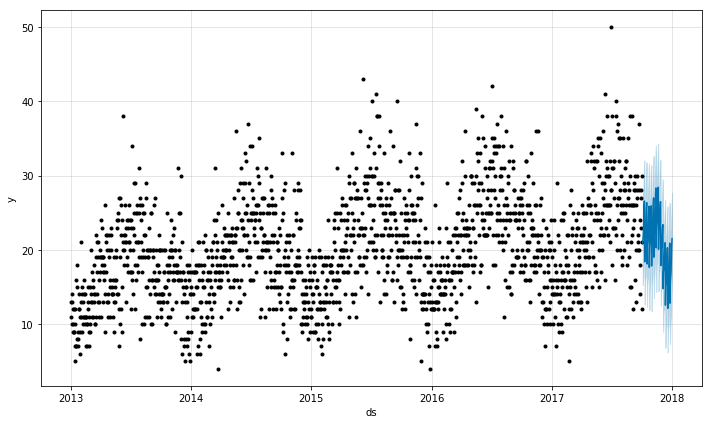

In [7]:
forecast, test = fb_prophet_prediction(df_train, 1, 1)

In [12]:
from fbprophet.plot import pl


ImportError: cannot import name 'plot_plotly'

In [8]:
test

,ds,y
0,2017-10-03,18
1,2017-10-04,15
2,2017-10-05,20
3,2017-10-06,19
4,2017-10-07,22
5,2017-10-08,19
6,2017-10-09,9
7,2017-10-10,23
8,2017-10-11,14
9,2017-10-12,24


In [9]:
df_train.head(10)

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
2013-01-06,1,1,12
2013-01-07,1,1,10
2013-01-08,1,1,9
2013-01-09,1,1,12


In [10]:
df_tr = df_train[(df_train['store'] == 1) & (df_train['item'] == 1)]

In [11]:
df_tr[:-90].shape

(1736, 3)